# Método da Oscilação ou Método da Sensibilidade

In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import math

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp= 26.431820859167672
Tau= 984.0594888279699
Delay= 99.29375000395189

In [5]:
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([26.43182086]), array([984.05948883,   1.        ]))

## Pade Approximation / Dead Time

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.00020286]), array([1.00000000e+00, 2.01422547e-02, 2.02855212e-04]))

## FOPDT

In [7]:
FOPDT = control.series(sys, Pade)
FOPDT

TransferFunction(array([0.00536183]), array([9.84059489e+02, 2.08211768e+01, 2.19763851e-01, 2.02855212e-04]))

In [8]:
# Simulate step response
t, y = control.step_response(FOPDT)

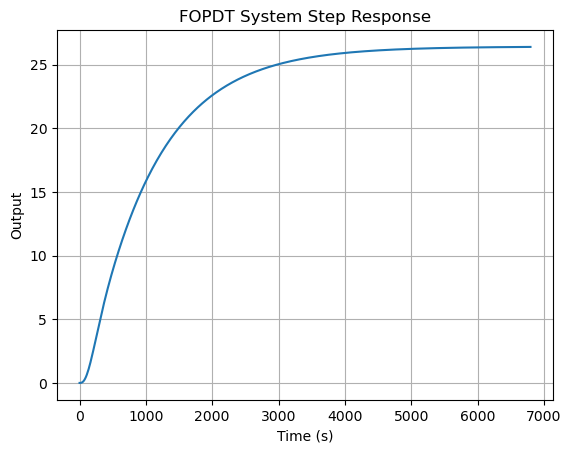

In [9]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('FOPDT System Step Response')
plt.grid()
plt.show()

## ZIEGLER e NICHOLS - Método 2

### Determine Ku and Pu

In [10]:
Poles = control.poles(FOPDT)
Poles

array([-0.01007113+0.01007113j, -0.01007113-0.01007113j,
       -0.0010162 +0.j        ])

In [11]:
gm, pm, sm, wpc, wgc, wms = control.stability_margins(FOPDT)

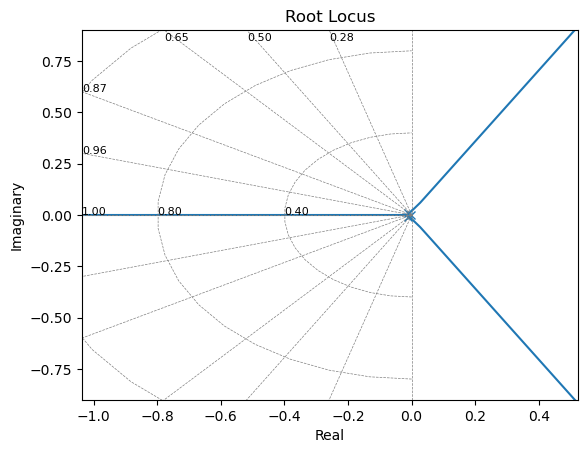

In [12]:
roots, gains = control.root_locus(FOPDT)

### Ganho Limite / Crítico

In [13]:
#Gain margin
Ku = gm
Ku

0.8293820972971115

### Período Crítico

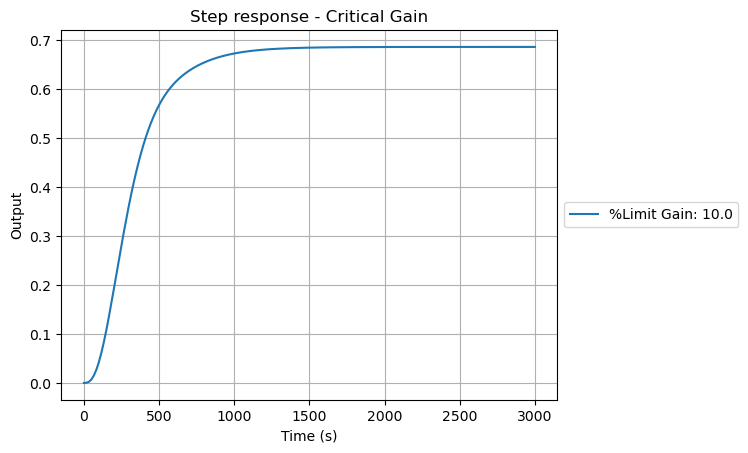

In [14]:
plt.figure(1)
for i in [10]:
    Controller = Ku*i/100
    Sys_Control = control.series(Controller, FOPDT)
    cl_sys = control.feedback(Sys_Control, 1, sign=-1)
    t, y = control.step_response(cl_sys, 3000)
    plt.plot(t, y, label= ("%Limit Gain: {:.1f}".format(i)))

plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response - Critical Gain')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

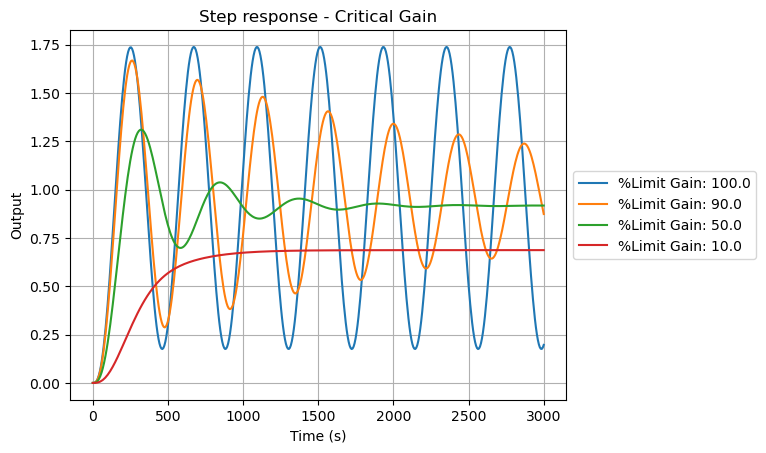

In [15]:
plt.figure(2)
for i in [100, 90, 50, 10]:
    Controller = Ku*i/100
    Sys_Control = control.series(Controller, FOPDT)
    cl_sys = control.feedback(Sys_Control, 1, sign=-1)
    t, y = control.step_response(cl_sys, 3000)
    plt.plot(t, y, label= ("%Limit Gain: {:.1f}".format(i)))

plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response - Critical Gain')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

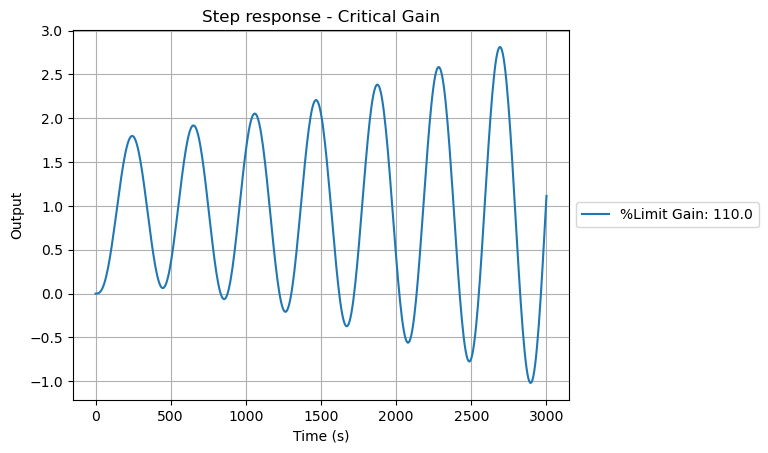

In [16]:
plt.figure(3)
for i in [110]:
    Controller = Ku*i/100
    Sys_Control = control.series(Controller, FOPDT)
    cl_sys = control.feedback(Sys_Control, 1, sign=-1)
    t, y = control.step_response(cl_sys, 3000)
    plt.plot(t, y, label= ("%Limit Gain: {:.1f}".format(i)))

plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response - Critical Gain')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()